In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv(r"C:\Users\Asus\OneDrive\Dataset\mnist.csv", low_memory=False)

In [7]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
y = df['label']
X = df.drop(columns=['label'], axis=1)

In [22]:
X.shape, y.shape

((60000, 784), (60000,))

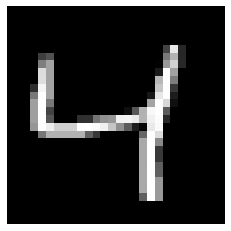

In [24]:
plt.imshow(X.values[2].reshape(28,28))
plt.gray()
plt.axis('off')
plt.show()

In [25]:
X = X/255 #scaling values of X in between 0 and 1

In [26]:
y = pd.get_dummies(y)

In [27]:
y.shape

(60000, 10)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12, test_size=0.2)

In [31]:
X_test.shape, X_train.shape

((12000, 784), (48000, 784))

In [32]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.regularizers import l2


In [33]:
from livelossplot import PlotLossesKerasTF
from tensorflow.keras import callbacks

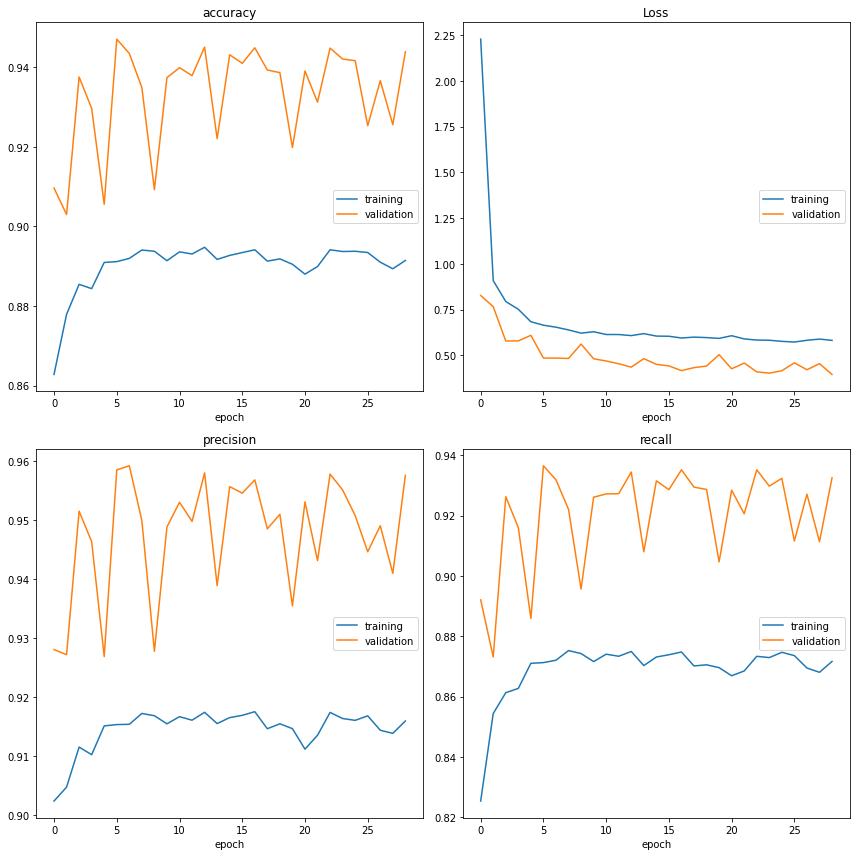

accuracy
	training         	 (min:    0.863, max:    0.895, cur:    0.891)
	validation       	 (min:    0.903, max:    0.947, cur:    0.944)
Loss
	training         	 (min:    0.572, max:    2.229, cur:    0.581)
	validation       	 (min:    0.395, max:    0.827, cur:    0.395)
precision
	training         	 (min:    0.902, max:    0.917, cur:    0.916)
	validation       	 (min:    0.927, max:    0.959, cur:    0.958)
recall
	training         	 (min:    0.825, max:    0.875, cur:    0.872)
	validation       	 (min:    0.873, max:    0.937, cur:    0.933)
1500/1500 [==============================] - 11s 7ms/step - loss: 0.5813 - accuracy: 0.8915 - precision: 0.9159 - recall: 0.8717 - val_loss: 0.3949 - val_accuracy: 0.9439 - val_precision: 0.9576 - val_recall: 0.9325


In [34]:
callback = callbacks.EarlyStopping(monitor='loss', patience=3)
model = Sequential()
model.add(Dense(1024, activation='relu', kernel_regularizer='l2'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu', kernel_regularizer='l2'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu', kernel_regularizer='l2'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', Precision(), Recall()])
model.fit(X_train, y_train, epochs=50, callbacks=[PlotLossesKerasTF(), callback], validation_data=(X_test, y_test))

In [35]:
y_pred = model.predict(X_test)

In [38]:
y_p = y_pred.argmax(axis=1)

In [42]:
y_t = y_test.values.argmax(axis=1)

In [43]:
pd.crosstab(y_t, y_p)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,1174,0,5,1,3,0,2,1,3,0
1,0,1355,2,0,3,5,0,3,0,0
2,10,12,1178,10,8,2,6,14,9,1
3,5,11,30,1069,0,48,3,7,6,4
4,2,3,4,0,1122,1,13,3,2,29
5,23,2,6,11,2,1002,24,3,3,4
6,17,1,1,0,5,6,1115,0,6,0
7,2,16,12,7,6,0,0,1204,0,7
8,16,32,20,11,7,24,16,3,1039,9


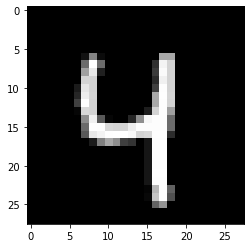

Actual res 4
Pred res 4


In [45]:
img_num = 1
img_check = X_test.values[img_num].reshape(28,28)
plt.imshow(img_check)
plt.show()
print('Actual res', y_t[img_num])
print('Pred res', y_p[img_num])